In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df = pd.read_csv("sonar_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape

(208, 61)

In [4]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
target = df[60]

In [8]:
for cell in target:
    target.replace({'M': 0, 'R': 1}, inplace=True)
    

In [9]:
target

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int64

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [11]:
X = df.drop(60, axis='columns')
y = df[60]
y.sample(10)

76     1
178    0
99     0
29     1
102    0
203    0
173    0
58     1
90     1
74     1
Name: 60, dtype: int64

In [12]:
df[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [20]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100


20/20 [==============================] - 2s 5ms/step - loss: 0.6876 - accuracy: 0.5321
Epoch 2/100
20/20 [==============================] - 0s 822us/step - loss: 0.6565 - accuracy: 0.6795
Epoch 3/100
20/20 [==============================] - 0s 843us/step - loss: 0.6251 - accuracy: 0.6859
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7244
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7756
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7564
Epoch 7/100
20/20 [==============================] - 0s 822us/step - loss: 0.4790 - accuracy: 0.8462
Epoch 8/100
20/20 [==============================] - 0s 822us/step - loss: 0.4593 - accuracy: 0.7885
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8526
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7756

20/20 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 1.0000
Epoch 78/100
20/20 [==============================] - 0s 822us/step - loss: 0.0210 - accuracy: 0.9936
Epoch 79/100
20/20 [==============================] - 0s 843us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 80/100
20/20 [==============================] - 0s 823us/step - loss: 0.0212 - accuracy: 1.0000
Epoch 81/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 82/100
20/20 [==============================] - 0s 823us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 83/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 84/100
20/20 [==============================] - 0s 822us/step - loss: 0.0143 - accuracy: 1.0000
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 822us/step - loss: 0.0190 - accuracy: 1.0000
E

In [22]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.2267 - accuracy: 0.7500


[1.2267365455627441, 0.75]

In [26]:
y_pred = model.predict(X_test).reshape(-1)
y_pred[:10]

2/2 [==============================] - 0s 16ms/step


array([2.2343547e-09, 9.3639147e-01, 5.4514635e-01, 3.1837902e-05,
       9.9999797e-01, 9.9940181e-01, 3.3557404e-02, 9.9999785e-01,
       9.4656588e-07, 9.9999851e-01], dtype=float32)

In [27]:
y_pred = np.round(y_pred)
y_pred[:10]

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1.], dtype=float32)

In [30]:
y_test[:10]

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
Name: 60, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.80      0.64      0.71        25

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



Text(95.72222222222221, 0.5, 'Truth')

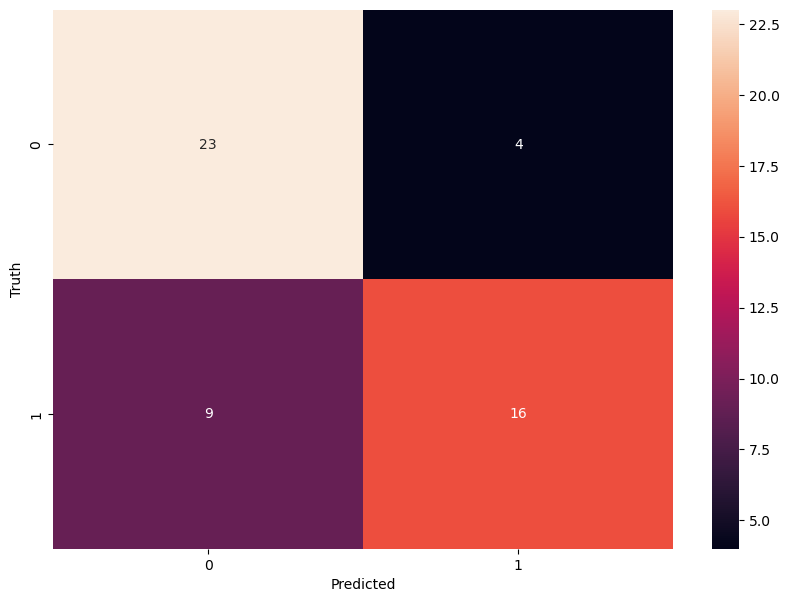

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7331 - accuracy: 0.5513
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5064
Epoch 3/100
20/20 [==============================] - 0s 876us/step - loss: 0.6932 - accuracy: 0.5833
Epoch 4/100
20/20 [==============================] - 0s 823us/step - loss: 0.7005 - accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 0s 822us/step - loss: 0.6999 - accuracy: 0.5641
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5577
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5641
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6282
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5128
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.4808
Epo

20/20 [==============================] - 0s 824us/step - loss: 0.3354 - accuracy: 0.8590
Epoch 83/100
20/20 [==============================] - 0s 822us/step - loss: 0.2953 - accuracy: 0.8910
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8654
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8590
Epoch 86/100
20/20 [==============================] - 0s 822us/step - loss: 0.3327 - accuracy: 0.8718
Epoch 87/100
20/20 [==============================] - 0s 822us/step - loss: 0.3044 - accuracy: 0.8974
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8654
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9038
Epoch 90/100
20/20 [==============================] - 0s 822us/step - loss: 0.3442 - accuracy: 0.8526
Epoch 91/100
20/20 [==============================] - 0s 822us/step - loss: 0.2793 - accuracy: 0.8974
E

In [37]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.4837 - accuracy: 0.7500


[0.4836960434913635, 0.75]

In [38]:
y_pred = model.predict(X_test).reshape(-1)
y_pred = np.round(y_pred)

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.86      0.72      0.78        25

    accuracy                           0.81        52
   macro avg       0.82      0.80      0.81        52
weighted avg       0.81      0.81      0.81        52



Text(95.72222222222221, 0.5, 'Truth')

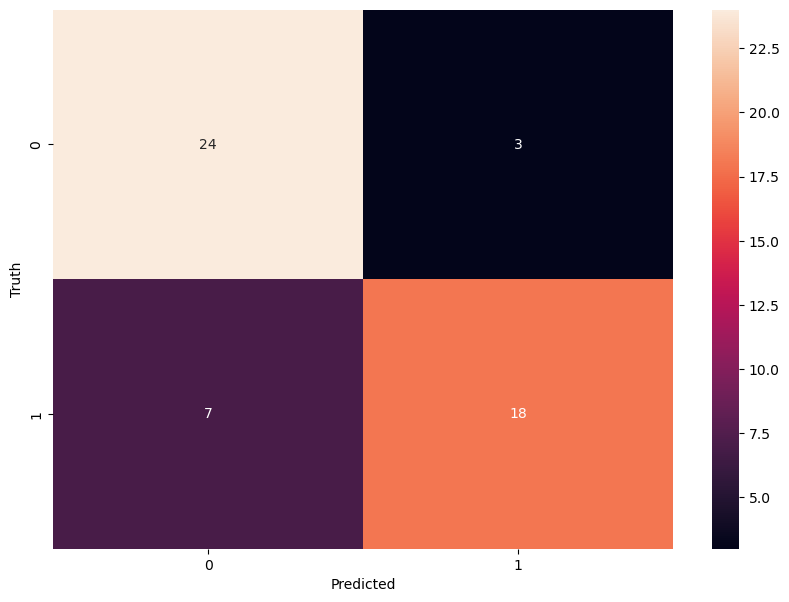

In [39]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')